# PROJECT

# ARIMA

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import os
os.getcwd()

'C:\\Users\\IPSITA PATNAIK\\Desktop\\Project'

In [3]:
sales = pd.read_csv("C:\\Users\\IPSITA PATNAIK\\Desktop\\Project\\train.csv")
sales['date'].min(), sales['date'].max()
sales.drop(['store','item'], axis=1, inplace=True)
sales = sales.sort_values('date')
sales.isnull().sum()
sales['date'] = pd.to_datetime(sales['date'])
sales = sales.set_index('date')
sales.index

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31',
               '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31',
               '2017-12-31', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=913000, freq=None)

In [4]:
sales

,sales
date,
2013-01-01,13
2013-01-01,26
2013-01-01,27
2013-01-01,54
2013-01-01,35
2013-01-01,41
2013-01-01,23
2013-01-01,37
2013-01-01,51


In [5]:
y = sales['sales'].resample('MS').mean()
y['2017':]

date
2017-01-01    39.826194
2017-02-01    44.383500
2017-03-01    53.075290
2017-04-01    62.590800
2017-05-01    65.850710
2017-06-01    70.974933
2017-07-01    75.573742
2017-08-01    66.219548
2017-09-01    62.350867
2017-10-01    57.494194
2017-11-01    61.922467
2017-12-01    44.849677
Freq: MS, Name: sales, dtype: float64

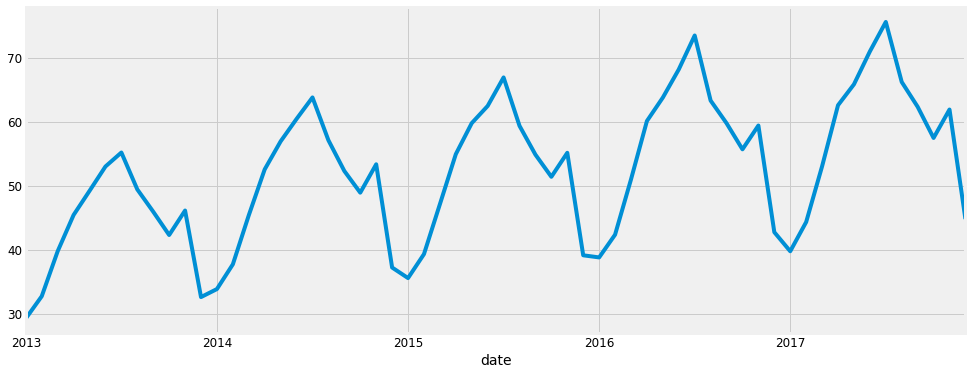

In [6]:
y.plot(figsize=(15, 6))
plt.show()

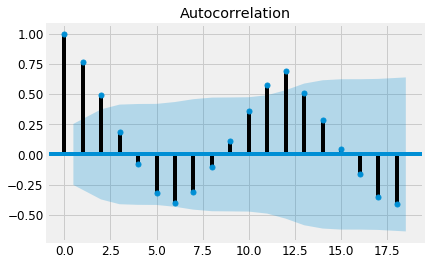

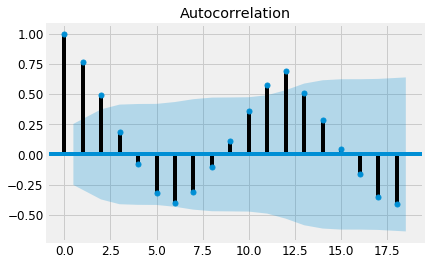

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y)

Order Date
2016-01-01     613.566267
2016-02-01     574.572846
2016-03-01     797.139957
2016-04-01     585.658150
2016-05-01    1188.071411
2016-06-01     700.584200
2016-07-01     742.909176
2016-08-01     971.386409
2016-09-01     874.372423
2016-10-01     680.867550
2016-11-01     983.663476
2016-12-01    1275.715521
2017-01-01     925.827053
2017-02-01    1049.935400
2017-03-01     621.655512
2017-04-01     557.245886
2017-05-01     539.623495
2017-06-01     771.083705
2017-07-01     638.451841
2017-08-01     965.216000
2017-09-01     996.806227
2017-10-01     753.598800
2017-11-01    1242.404375
2017-12-01     973.765627
Freq: MS, Name: Sales, dtype: float64

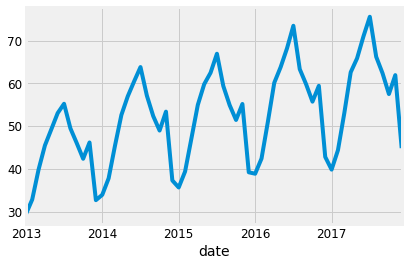

In [8]:
y.plot()

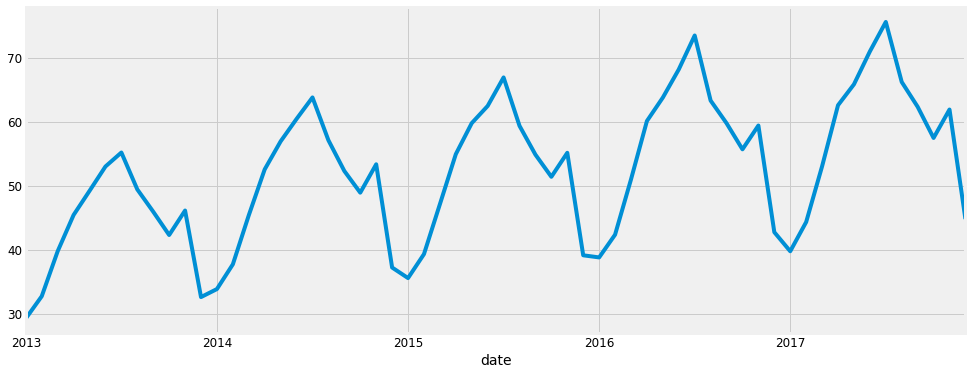

In [9]:
y.plot(figsize=(15, 6))
plt.show()

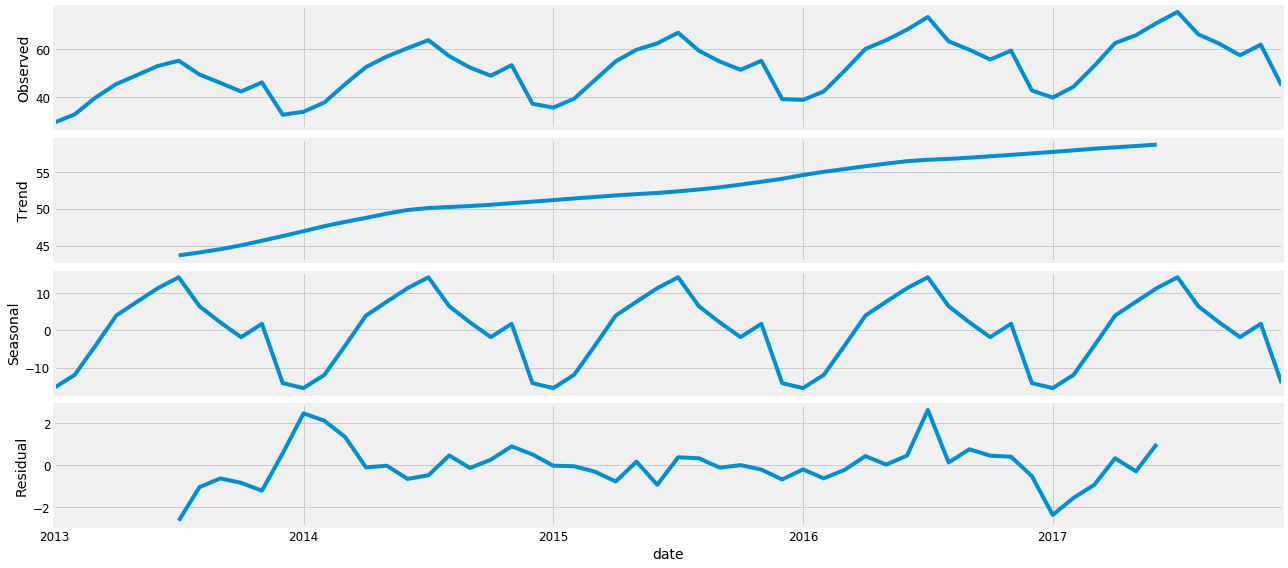

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [11]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [12]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:639.3903169231556


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:515.545063887946
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:272.69049432052384


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1226.9538454660483
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:214.87722464483306
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:194.2026210978883
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:159.12960769429364
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1173.0606126763435
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:564.702950446029


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:454.78360922935644
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:216.73070622374343


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1373.6233550298457


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:217.91149544437175
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:164.46473204767457
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:134.5771866565113


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1068.0415474031906
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:391.16370596945023
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:280.0169338210146
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:141.28001678101307


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1409.4153854511073
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:138.60023667081202
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:135.91966797936004
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:101.09291937376749


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1632.162774145447
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:384.96710604512583
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:274.2395771456331
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:140.61103654659357
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1416.6598746336342
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:138.93500778838083


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:137.62167836818463
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:98.18501104848704
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1428.2685990274288
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:399.0339765043369
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:322.87355183490666
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:144.16169983552746


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1478.4910921321884
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:137.3742644760068
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:136.19430647648787
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:102.41329405494827


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1163.7237303581278
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:393.5118995581225


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:283.1902570397929
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:143.70107617722687


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1246.7080968338453
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:138.3950220081904


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:138.98728318711323
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:99.98958117647834


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:940.9896291742921
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:391.06416140520935
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:280.09009468821466
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:143.0318404147252


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1328.630422045297
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:137.12786860817636


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:139.5597133743865
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:96.29950378515731


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1340.5303203350593
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:386.1906788782789
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:276.1177012157655
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:142.00454208716215


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1341.8313376181293
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:139.01319908842524


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:139.77951328276623
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:98.0057702800064
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1353.4402141099347


A:\PYTHON\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [13]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2356      0.580     -0.406      0.684      -1.372       0.901
ma.L1         -0.1644      0.500     -0.329      0.742      -1.145       0.816
ar.S.L12      -0.0679      0.138     -0.492      0.623      -0.339       0.203
sigma2         0.8263      0.170      4.871      0.000       0.494       1.159


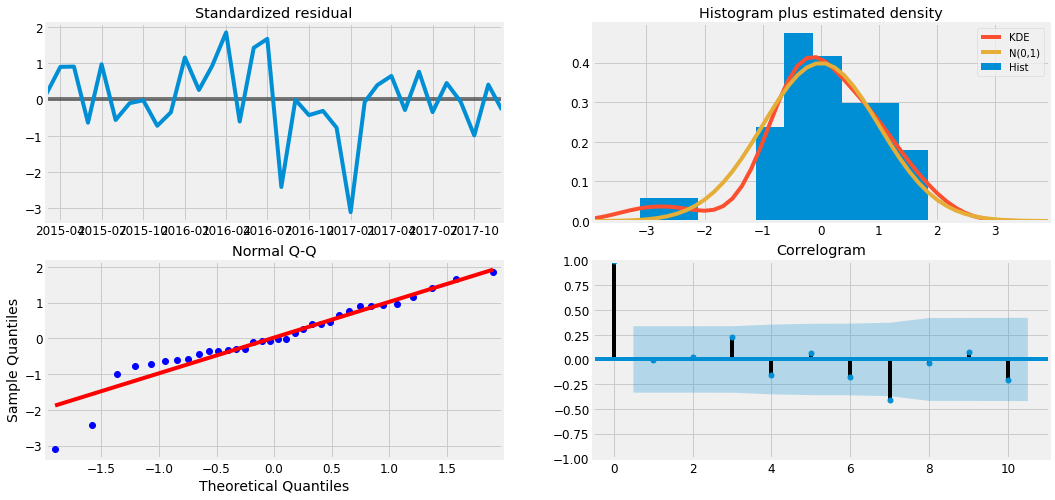

In [14]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

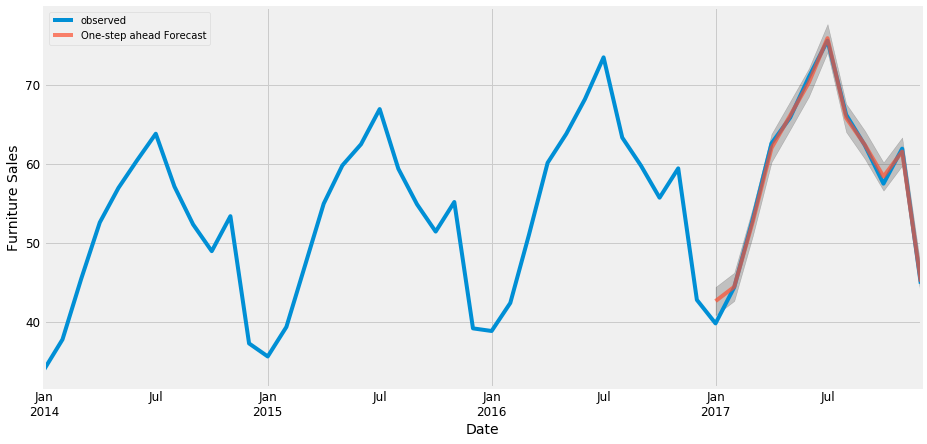

In [15]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [16]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.86


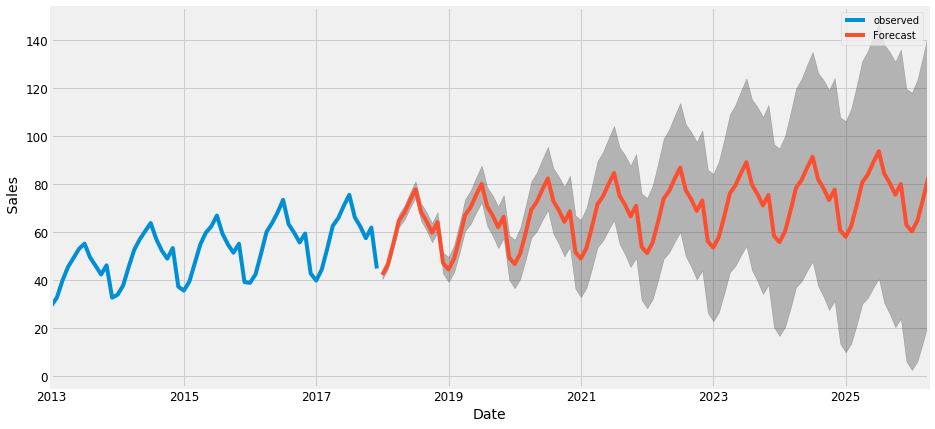

In [17]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel(' Sales')
plt.legend()
plt.show()

# MLP

In [18]:
import warnings
import numpy as np
import pandas as pd
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [19]:
train = pd.read_csv('C:\\Users\\IPSITA PATNAIK\\Desktop\\Project\\train.csv', parse_dates=['date'])

In [20]:
#Time Period of dataset
print('Min date from train set: %s' % train['date'].min().date())
print('Max date from train set: %s' % train['date'].max().date())

Min date from train set: 2013-01-01
Max date from train set: 2017-12-31


In [21]:
#Sub-sample train set to get only the last year of data and reduce training time
train = train[(train['date'] >= '2017-01-01')]

In [22]:
#Rearrange dataset so we can apply shift methods
train_gp = train.sort_values('date').groupby(['item', 'store', 'date'], as_index=False)
train_gp = train_gp.agg({'sales':['mean']})
train_gp.columns = ['item', 'store', 'date', 'sales']
train_gp.head()

,item,store,date,sales
0,1,1,2017-01-01,19
1,1,1,2017-01-02,15
2,1,1,2017-01-03,10
3,1,1,2017-01-04,16
4,1,1,2017-01-05,14


In [23]:
#Transform the data into a time series problem
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [24]:
#use the current timestep and the last 29 to forecast 90 days ahead¶
window = 29
lag = 90
series = series_to_supervised(train_gp.drop('date', axis=1), window=window, lag=90)
series.head()

,item(t-29),store(t-29),sales(t-29),item(t-28),store(t-28),sales(t-28),item(t-27),store(t-27),sales(t-27),item(t-26),...,sales(t-2),item(t-1),store(t-1),sales(t-1),item(t),store(t),sales(t),item(t+90),store(t+90),sales(t+90)
29,1.0,1.0,19.0,1.0,1.0,15.0,1.0,1.0,10.0,1.0,...,16.0,1.0,1.0,24.0,1,1,9,1.0,1.0,33.0
30,1.0,1.0,15.0,1.0,1.0,10.0,1.0,1.0,16.0,1.0,...,24.0,1.0,1.0,9.0,1,1,17,1.0,1.0,15.0
31,1.0,1.0,10.0,1.0,1.0,16.0,1.0,1.0,14.0,1.0,...,9.0,1.0,1.0,17.0,1,1,15,1.0,1.0,21.0
32,1.0,1.0,16.0,1.0,1.0,14.0,1.0,1.0,24.0,1.0,...,17.0,1.0,1.0,15.0,1,1,17,1.0,1.0,29.0
33,1.0,1.0,14.0,1.0,1.0,24.0,1.0,1.0,14.0,1.0,...,15.0,1.0,1.0,17.0,1,1,24,1.0,1.0,19.0


In [25]:
#Drop rows with different item or store values than the shifted columns
last_item = 'item(t-%d)' % window
last_store = 'store(t-%d)' % window
series = series[(series['store(t)'] == series[last_store])]
series = series[(series['item(t)'] == series[last_item])]

In [26]:
#Remove unwanted columns
columns_to_drop = [('%s(t+%d)' % (col, lag)) for col in ['item', 'store']]
for i in range(window, 0, -1):
    columns_to_drop += [('%s(t-%d)' % (col, i)) for col in ['item', 'store']]
series.drop(columns_to_drop, axis=1, inplace=True)
series.drop(['item(t)', 'store(t)'], axis=1, inplace=True)

In [27]:
# train test split
# Label
labels_col = 'sales(t+%d)' % 90
labels = series[labels_col]
series = series.drop(labels_col, axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(series, labels.values, test_size=0.4, random_state=0)
print('Train set shape', X_train.shape)
print('Test set shape', X_test.shape)
X_train.head()

Train set shape (100746, 30)
Test set shape (67164, 30)


,sales(t-29),sales(t-28),sales(t-27),sales(t-26),sales(t-25),sales(t-24),sales(t-23),sales(t-22),sales(t-21),sales(t-20),...,sales(t-9),sales(t-8),sales(t-7),sales(t-6),sales(t-5),sales(t-4),sales(t-3),sales(t-2),sales(t-1),sales(t)
18801,97.0,111.0,90.0,115.0,123.0,70.0,99.0,74.0,107.0,108.0,...,85.0,95.0,123.0,109.0,127.0,132.0,87.0,101.0,102.0,114
160385,38.0,43.0,43.0,55.0,47.0,51.0,38.0,41.0,37.0,59.0,...,41.0,38.0,38.0,53.0,53.0,45.0,44.0,24.0,30.0,37
73123,55.0,45.0,41.0,46.0,47.0,36.0,30.0,46.0,41.0,42.0,...,38.0,36.0,40.0,50.0,44.0,44.0,40.0,38.0,50.0,49
90428,139.0,157.0,85.0,99.0,136.0,110.0,121.0,123.0,147.0,91.0,...,130.0,128.0,128.0,95.0,116.0,110.0,117.0,118.0,129.0,132
167151,86.0,58.0,88.0,87.0,114.0,113.0,64.0,76.0,87.0,81.0,...,55.0,66.0,59.0,53.0,63.0,59.0,77.0,39.0,56.0,62


In [28]:
epochs = 50 
batch = 256
lr = 0.0003
adam = optimizers.Adam(lr)

Instructions for updating:
Colocations handled automatically by placer.


In [29]:
model_mlp = Sequential()
model_mlp.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model_mlp.add(Dense(1))
model_mlp.compile(loss='mse', optimizer=adam)
model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 3,201
Trainable params: 3,201
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_mlp.fit(X_train.values,Y_train, epochs=epochs, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 3s - loss: 406.4138
Epoch 2/50
 - 3s - loss: 371.7095
Epoch 3/50
 - 3s - loss: 361.9107
Epoch 4/50
 - 3s - loss: 358.7529
Epoch 5/50
 - 2s - loss: 355.9259
Epoch 6/50
 - 3s - loss: 355.2711
Epoch 7/50
 - 2s - loss: 354.2125
Epoch 8/50
 - 2s - loss: 353.0795
Epoch 9/50
 - 2s - loss: 352.4454
Epoch 10/50
 - 3s - loss: 351.2176
Epoch 11/50
 - 3s - loss: 350.5674
Epoch 12/50
 - 3s - loss: 349.9530
Epoch 13/50
 - 2s - loss: 349.3474
Epoch 14/50
 - 2s - loss: 348.2064
Epoch 15/50
 - 2s - loss: 347.4153
Epoch 16/50
 - 3s - loss: 347.1802
Epoch 17/50
 - 2s - loss: 346.5735
Epoch 18/50
 - 3s - loss: 346.7843
Epoch 19/50
 - 2s - loss: 345.2618
Epoch 20/50
 - 2s - loss: 345.3000
Epoch 21/50
 - 2s - loss: 344.7927
Epoch 22/50
 - 2s - loss: 344.8295
Epoch 23/50
 - 2s - loss: 344.3763
Epoch 24/50
 - 2s - loss: 344.0330
Epoch 25/50
 - 2s - loss: 343.7880
Epoch 26/50
 - 2s - loss: 343.1761
Epoch 27/50
 - 2s - loss: 343.1655
Epoch 28/50
 - 3

In [31]:
#Mlp on Train and Test set
mlp_train_pred = model_mlp.predict(X_train.values)
mlp_test_pred = model_mlp.predict(X_test.values)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, mlp_train_pred)))
print('Test rmse:', np.sqrt(mean_squared_error(Y_test, mlp_test_pred)))

Train rmse: 18.356904771831537
Test rmse: 18.48806139027369
